# Usage of trained models for prediction of potential additive properties
Import relevant libraries

In [1]:
from bayesian_optimization.MyGraphConvModel import MyGraphConvModel # customized GraphConvModel
import deepchem as dc

Skipped loading some Pytorch utilities, missing a dependency. No module named 'torch'


This module requires PyTorch to be installed.


No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
2024-10-15 10:30:44.523293: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 10:30:44.703558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 10:30:44.703605: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 10:30:44.704491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alr

Restore models from curently saved folders

In [2]:
SEI_model = MyGraphConvModel(n_tasks=4, graph_conv_layers=[465, 465], dense_layers=[342, 342, 342], dropout=0.016595, \
learning_rate=0.0018738, uncertainty=True, model_dir="final_SEI_model")
SEI_model.restore()

LL_model = MyGraphConvModel(n_tasks=4, graph_conv_layers=[545, 545], dense_layers=[562, 562, 562, 562], dropout=0.030050724302585315, \
learning_rate=0.0006959499230450821, uncertainty=True, model_dir="final_LL_model")
LL_model.restore()

2024-10-15 10:30:50.762118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-15 10:30:50.776687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-15 10:30:50.776836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Use the models to make predictions

In [3]:
smiles = ["FC(F)(F)C(=O)CC(=O)C(F)(F)F", "CS(=O)(=O)C"]
featurizer=dc.feat.ConvMolFeaturizer()
loader = dc.data.InMemoryLoader(tasks=[None], featurizer=featurizer)
dataset = loader.create_dataset(smiles)
predictions, uncertainty = SEI_model.predict_uncertainty(dataset)
print(f"SEI model:\nThe predicted LUMO energy (eV) are: {predictions[:,0]}\n"
      f"The predicted (100) interaction energy (eV) are {predictions[:,1]}\n"
      f"The predicted (110) interaction energy (eV) are {predictions[:,2]}\n"
      f"The predicted (111) interaction energy (eV) are {predictions[:,3]}\n")
predictions, uncertainty = LL_model.predict_uncertainty(dataset)
print(f"LL model:\nThe predicted LUMO energy (eV) are: {predictions[:,0]}\n"
      f"The predicted (100) interaction energy (eV) are {predictions[:,1]}\n"
      f"The predicted (110) interaction energy (eV) are {predictions[:,2]}\n"
      f"The predicted (111) interaction energy (eV) are {predictions[:,3]}\n")

2024-10-15 10:30:55.609830: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


SEI model:
The predicted LUMO energy (eV) are: [-2.2518635  -0.56759053]
The predicted (100) interaction energy (eV) are [-10.363928   -4.0133967]
The predicted (110) interaction energy (eV) are [-10.778164   -3.8963735]
The predicted (111) interaction energy (eV) are [-7.547854 -4.983596]

LL model:
The predicted LUMO energy (eV) are: [-1.9368743  1.6428459]
The predicted (100) interaction energy (eV) are [-7.6606364 -3.920909 ]
The predicted (110) interaction energy (eV) are [-8.764194  -3.5770113]
The predicted (111) interaction energy (eV) are [-7.204398  -5.4094276]



Visualize the molecule by drawing its structure

[10:31:36] The new font size 1 is below the current minimum (6).


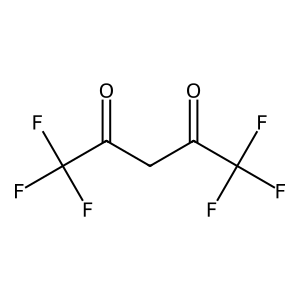

[10:31:36] The new font size 1 is below the current minimum (6).


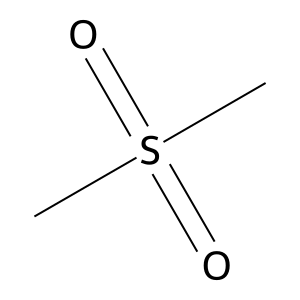

In [4]:
from IPython.display import SVG, display
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import DrawingOptions

for s in smiles:
    mol = Chem.MolFromSmiles(s)
    rdDepictor.Compute2DCoords(mol)  # for generating conformer ID
    # create a drawer container
    drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
    # define drawer options
    drawer.drawOptions().updateAtomPalette({k: (0, 0, 0) for k in DrawingOptions.elemDict.keys()})
    drawer.SetLineWidth(2)
    drawer.SetFontSize(1.0)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    # generate and write the svg strings
    svg = drawer.GetDrawingText().replace('svg:', '')
    display(SVG(svg))